In [1]:
!pip install findspark
import findspark
findspark.init()

!pip install pyspark

In [2]:
!pip install pandas

In [3]:
import pyspark
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as func

In [4]:
conda install matplotlib

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plot
import numpy as nump
%matplotlib inline

In [6]:
spark = SparkSession \
.builder \
.appName("PySpark App") \
.getOrCreate()


In [7]:
readexcel = pd.read_excel('C:/Users/CPS/HPI_AT_BDL_ZIP3.xlsx')
print(readexcel.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38502 entries, 0 to 38501
Data columns (total 6 columns):
Three-Digit ZIP Code    38502 non-null int64
Year                    38502 non-null int64
Annual Change (%)       38502 non-null object
HPI                     38502 non-null object
HPI with 1990 base      38502 non-null object
HPI with 2000 base      38502 non-null object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB
None


In [8]:
readexcel['Annual Change (%)'] = pd.to_numeric(readexcel['Annual Change (%)'], errors='coerce')
readexcel['HPI'] = pd.to_numeric(readexcel['HPI'], errors='coerce')
readexcel['HPI with 1990 base'] = pd.to_numeric(readexcel['HPI with 1990 base'], errors='coerce')
readexcel['HPI with 2000 base'] = pd.to_numeric(readexcel['HPI with 2000 base'], errors='coerce')
readexcel=readexcel.dropna()
readexcel.isna().sum()

Three-Digit ZIP Code    0
Year                    0
Annual Change (%)       0
HPI                     0
HPI with 1990 base      0
HPI with 2000 base      0
dtype: int64

In [9]:
dataset1 = spark.createDataFrame(readexcel)

In [10]:
print(len(readexcel))
print('Dataset overview')
pd.DataFrame(dataset1.dtypes, columns = ['Column','type'])

36041
Dataset overview


,Column,type
0,Three-Digit ZIP Code,bigint
1,Year,bigint
2,Annual Change (%),double
3,HPI,double
4,HPI with 1990 base,double
5,HPI with 2000 base,double


In [11]:
dataset1.printSchema()

root
 |-- Three-Digit ZIP Code: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Annual Change (%): double (nullable = true)
 |-- HPI: double (nullable = true)
 |-- HPI with 1990 base: double (nullable = true)
 |-- HPI with 2000 base: double (nullable = true)



In [12]:
dataset1.show(10)

+--------------------+----+-----------------+------+------------------+------------------+
|Three-Digit ZIP Code|Year|Annual Change (%)|   HPI|HPI with 1990 base|HPI with 2000 base|
+--------------------+----+-----------------+------+------------------+------------------+
|                  10|1976|             7.72|107.72|             24.84|             23.18|
|                  10|1977|              6.7|114.93|             26.51|             24.74|
|                  10|1978|             7.86|123.97|             28.59|             26.68|
|                  10|1979|            16.42|144.32|             33.29|             31.06|
|                  10|1980|             11.8|161.35|             37.21|             34.73|
|                  10|1981|             7.08|172.77|             39.85|             37.18|
|                  10|1982|            11.99|193.49|             44.63|             41.64|
|                  10|1983|             6.56|206.18|             47.55|             44.37|

In [13]:
dataset1.select('Three-Digit ZIP Code','Year','Annual Change (%)','HPI','HPI with 1990 base','HPI with 2000 base').describe().show()


+-------+--------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|Three-Digit ZIP Code|              Year|Annual Change (%)|               HPI|HPI with 1990 base|HPI with 2000 base|
+-------+--------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|               36041|             36041|            36041|             36041|             36041|             36041|
|   mean|   498.6425737354679|1999.5837518381843|4.147201520490553| 325.5512319303017| 148.3197283649177|105.50716794761516|
| stddev|   286.6674758693039|12.826085730596116|6.316998588681571|230.29105065073608| 69.36410156945963|  47.5181085218317|
|    min|                  10|              1976|           -43.25|             53.12|             19.16|             10.46|
|    max|                 999|              2021|            72.25|            2252.6|             751.4|            412.64|


In [14]:
dataset1.groupBy("Year").agg({'Annual Change (%)': 'mean'}).sort("avg(Annual Change (%))", ascending = True).show(15)


+----+----------------------+
|Year|avg(Annual Change (%))|
+----+----------------------+
|2009|    -4.725826296743065|
|2010|   -3.5191797346200238|
|2011|   -2.9336429433051867|
|2008|    -2.471785283474065|
|2012|   -0.6908805790108566|
|1982|    1.0165818759936411|
|2007|     2.172605548854041|
|1991|    2.2258262967430635|
|1992|     2.449215922798552|
|2013|     2.456067551266586|
|1990|    2.6243288996372436|
|1993|    2.6356936067551264|
|1994|    3.0755971049457185|
|1996|    3.1653558504221952|
|1997|    3.3422677925211097|
+----+----------------------+
only showing top 15 rows



In [15]:
dataset1.groupBy("Year").agg({'HPI' : 'max'}).sort("max(HPI)", ascending = False).show(15)


+----+--------+
|Year|max(HPI)|
+----+--------+
|2018|  2252.6|
|2019| 2235.87|
|2021| 2220.15|
|2020| 2087.96|
|2017|  2036.4|
|2016| 1926.75|
|2007| 1807.63|
|2006|  1803.6|
|2015| 1722.52|
|2005| 1717.32|
|2014| 1589.89|
|2008| 1589.08|
|2013| 1572.74|
|2012| 1523.89|
|2009| 1457.23|
+----+--------+
only showing top 15 rows



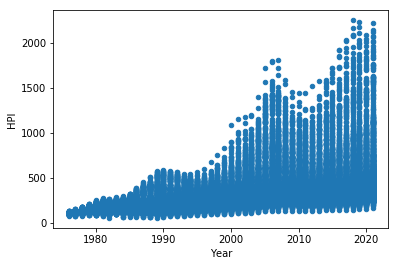

In [16]:
dataset1.toPandas().plot(kind = 'scatter', x = 'Year', y = 'HPI')

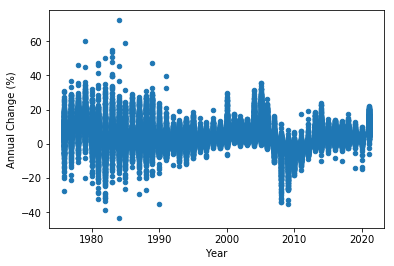

In [17]:
dataset1.toPandas().plot(kind = 'scatter', x = 'Year', y = 'Annual Change (%)')

In [18]:
readexcel2 = pd.read_excel('C:/Users/CPS/HPI_AT_BDL_ZIP5.xlsx')
print(readexcel.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36041 entries, 1 to 38501
Data columns (total 6 columns):
Three-Digit ZIP Code    36041 non-null int64
Year                    36041 non-null int64
Annual Change (%)       36041 non-null float64
HPI                     36041 non-null float64
HPI with 1990 base      36041 non-null float64
HPI with 2000 base      36041 non-null float64
dtypes: float64(4), int64(2)
memory usage: 1.9 MB
None


In [19]:
readexcel2['Annual Change (%)'] = pd.to_numeric(readexcel2['Annual Change (%)'], errors='coerce')
readexcel2['HPI'] = pd.to_numeric(readexcel2['HPI'], errors='coerce')
readexcel2['HPI with 1990 base'] = pd.to_numeric(readexcel2['HPI with 1990 base'], errors='coerce')
readexcel2['HPI with 2000 base'] = pd.to_numeric(readexcel2['HPI with 2000 base'], errors='coerce')
readexcel2=readexcel2.dropna()
readexcel2.isna().sum()

Five-Digit ZIP Code    0
Year                   0
Annual Change (%)      0
HPI                    0
HPI with 1990 base     0
HPI with 2000 base     0
dtype: int64

In [20]:
dataset2 = spark.createDataFrame(readexcel2)

In [21]:
print(len(readexcel2))
print('Dataset overview')
pd.DataFrame(dataset2.dtypes, columns = ['Column','type'])


355434
Dataset overview


,Column,type
0,Five-Digit ZIP Code,bigint
1,Year,bigint
2,Annual Change (%),double
3,HPI,double
4,HPI with 1990 base,double
5,HPI with 2000 base,double


In [22]:
dataset2.printSchema()

root
 |-- Five-Digit ZIP Code: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Annual Change (%): double (nullable = true)
 |-- HPI: double (nullable = true)
 |-- HPI with 1990 base: double (nullable = true)
 |-- HPI with 2000 base: double (nullable = true)



In [23]:
dataset2.show(10)

+-------------------+----+-----------------+------+------------------+------------------+
|Five-Digit ZIP Code|Year|Annual Change (%)|   HPI|HPI with 1990 base|HPI with 2000 base|
+-------------------+----+-----------------+------+------------------+------------------+
|               1001|1986|            14.16|114.16|             70.67|             69.62|
|               1001|1987|            21.05|138.19|             85.55|             84.28|
|               1001|1988|            17.64|162.56|            100.63|             99.14|
|               1001|1989|             0.89| 164.0|            101.53|            100.02|
|               1001|1990|             -1.5|161.54|             100.0|             98.52|
|               1001|1991|            -5.76|152.23|             94.24|             92.84|
|               1001|1992|            -1.29|150.27|             93.02|             91.64|
|               1001|1993|            -0.11|150.11|             92.92|             91.54|
|         

In [24]:
dataset2.select('Five-Digit ZIP Code','Year','Annual Change (%)','HPI','HPI with 1990 base','HPI with 2000 base').describe().show()


+-------+-------------------+-----------------+-----------------+-----------------+------------------+------------------+
|summary|Five-Digit ZIP Code|             Year|Annual Change (%)|              HPI|HPI with 1990 base|HPI with 2000 base|
+-------+-------------------+-----------------+-----------------+-----------------+------------------+------------------+
|  count|             355434|           355434|           355434|           355434|            355434|            355434|
|   mean|  49138.00271217723|2001.619811272979|4.285686484691951|295.4014652227985|158.80896819100045|113.47909578149535|
| stddev| 30900.634135962235| 11.7493005355642|7.511180535753306| 221.730179033808|  75.8669198979043| 51.27074847072266|
|    min|               1001|             1976|           -58.54|            44.32|             18.31|             10.45|
|    max|              99901|             2021|            93.68|           2751.9|           1089.25|            565.71|
+-------+---------------

In [25]:
dataset2.groupBy("Year").agg({'Annual Change (%)': 'mean'}).sort("avg(Annual Change (%))", ascending = True).show(15)


+----+----------------------+
|Year|avg(Annual Change (%))|
+----+----------------------+
|2009|    -7.680542328042332|
|2008|     -5.16549592241569|
|2010|    -4.339190649465214|
|2011|    -4.017239744155273|
|2012|    -1.118195745618869|
|1982|   -0.2721801082929617|
|2007|    0.5606799647344052|
|1991|    1.6761703769010354|
|1993|     1.779681612867687|
|1994|    2.0643532393124726|
|1992|    2.0815538902358384|
|1996|    2.9497432223936513|
|1990|    3.1330973850315598|
|1995|    3.2033954154727797|
|1997|    3.4712939490796866|
+----+----------------------+
only showing top 15 rows



In [26]:
dataset2.groupBy("Year").agg({'HPI' : 'max'}).sort("max(HPI)", ascending = False).show(15)

+----+--------+
|Year|max(HPI)|
+----+--------+
|2021|  2751.9|
|2018| 2657.94|
|2020| 2634.33|
|2019| 2571.46|
|2016| 2446.81|
|2017| 2401.97|
|2015|  2388.2|
|2014| 2178.29|
|2013|  1853.0|
|2006| 1790.64|
|2008| 1772.81|
|2007| 1739.24|
|2005| 1723.74|
|2012| 1671.96|
|2010| 1629.64|
+----+--------+
only showing top 15 rows



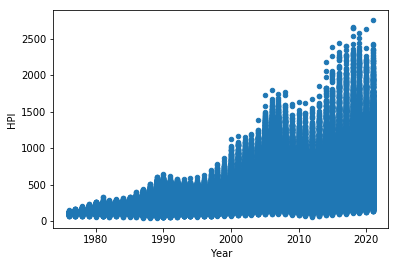

In [27]:
dataset2.toPandas().plot(kind = 'scatter', x = 'Year', y = 'HPI')


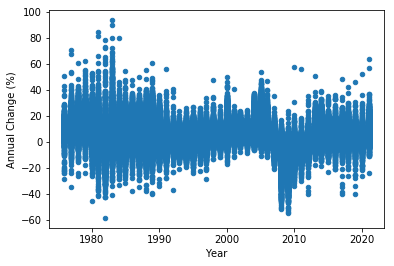

In [28]:
dataset2.toPandas().plot(kind = 'scatter', x = 'Year', y = 'Annual Change (%)')

In [29]:
spark.stop()